# Student Performance Indicator

This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

## Life cycle of Machine learning Project

- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-processing
- Model Training
- Choose best model

## 1) Data Collection

- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

## 1.1 Import Data and Required Packages

### Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library.

In [147]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Modelling
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor


### Import CSV data as Pandas DataFrame

In [2]:
df = pd.read_csv('stud.csv')

### Show Top 5 Records

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Shape of the dataset

In [4]:
df.shape

(1000, 8)

### 1.2 Dataset information
- gender : sex of students -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced)
- math score
- reading score
- writing score

### 2. Data Checks to perform
- Checking Missing Values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of dataset
- Check various categories present in the different categorical columns

### 2.1 Check Missing Values

In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

### There is no missing values in the data set

### 2.2 Check Duplicates 

In [6]:
df.duplicated().sum()

0

### There are no duplicate values in the data set

### 2.3 Check data types

In [7]:
# check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 2.4 Checking the number of unique values of each column

In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 2.5 Check statistics of data set



In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Insight

- From above description of numerical data, all means are very close to each other - between 66 and 68.05
- All standard deviations are also close - between 14.6 and 15.19.
- While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

### 2.7 Exploring Data


In [10]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
print("Categories in 'gender' variable:", df['gender'].unique())

print("\nCategories in 'race_ethnicity' variable:", df['race_ethnicity'].unique())

print("\nCategories in 'parental_level_education' variable:", df['parental_level_of_education'].unique())

print("\nCategories in 'lunch' variable:", df['lunch'].unique())

print("\nCategories in 'test preparation course' variable:", df['test_preparation_course'].unique())

Categories in 'gender' variable: ['female' 'male']

Categories in 'race_ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']

Categories in 'parental_level_education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Categories in 'lunch' variable: ['standard' 'free/reduced']

Categories in 'test preparation course' variable: ['none' 'completed']


In [12]:
# Define numerical & Categotical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features: {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features: {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features: ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [13]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


### 2.8 Adding columns for 'Total Score' and 'Average'

In [14]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [15]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [16]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


#### Insights

- From above values we get students have performed the worst in Maths
- Best performance is in reading section

### 3. Exploring Data (visualization)

### 3.1 Visualize average score distribution to make some conclusion.

- Histogram
- Kernel Distribution Function (KDE)

### 3.1.1 Histogram & KDE

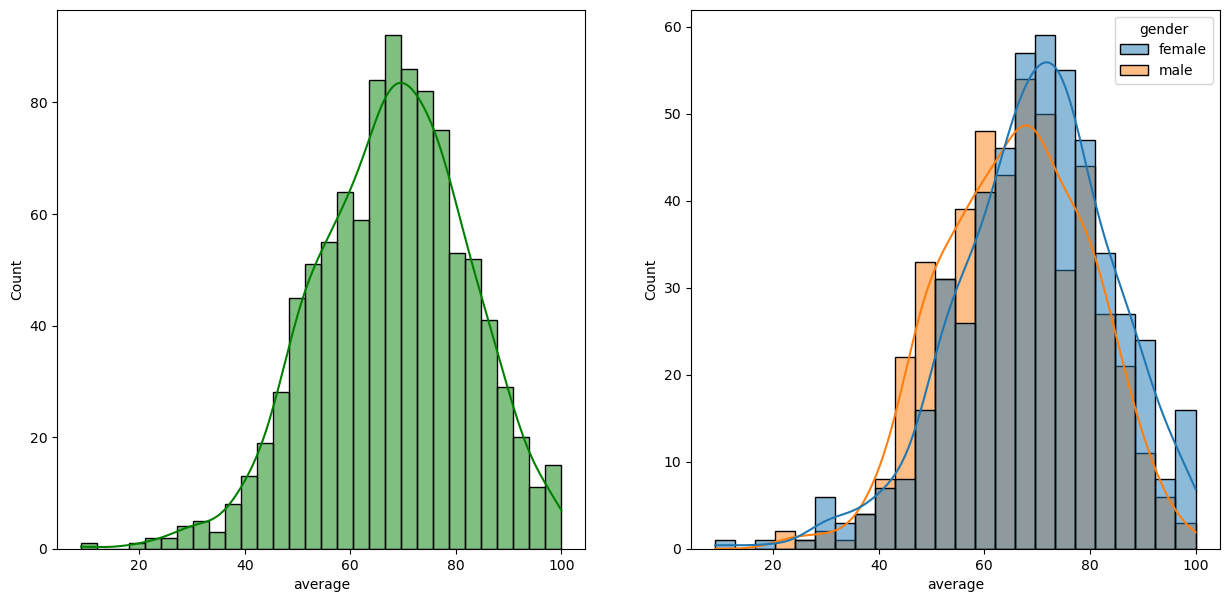

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

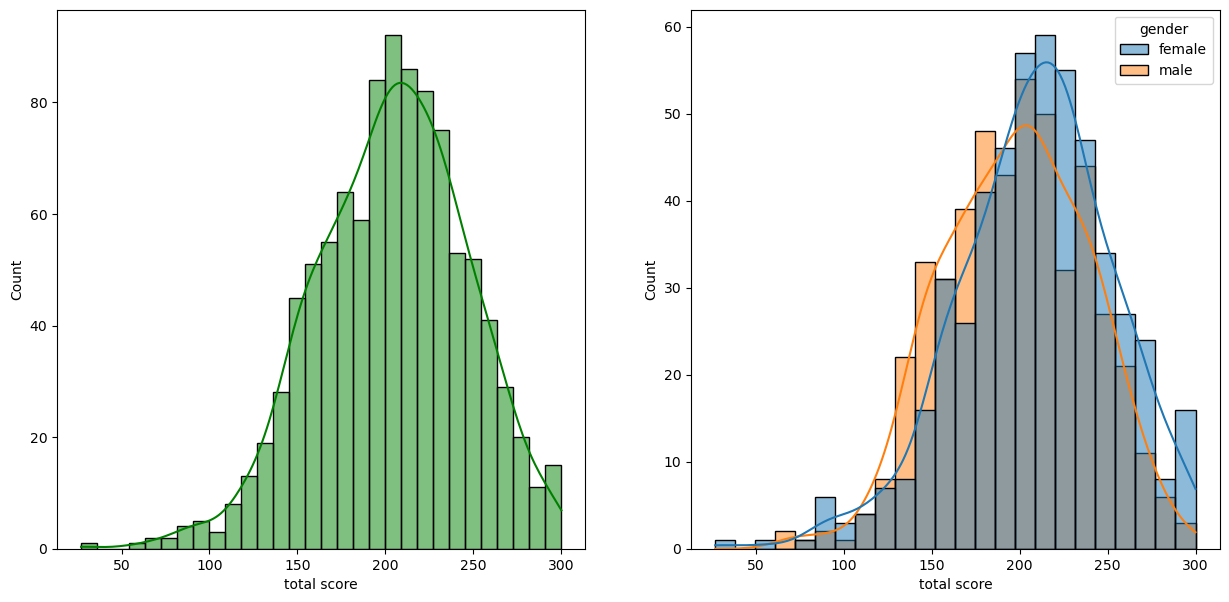

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

### Insights

- Female students tend to perform well than male students

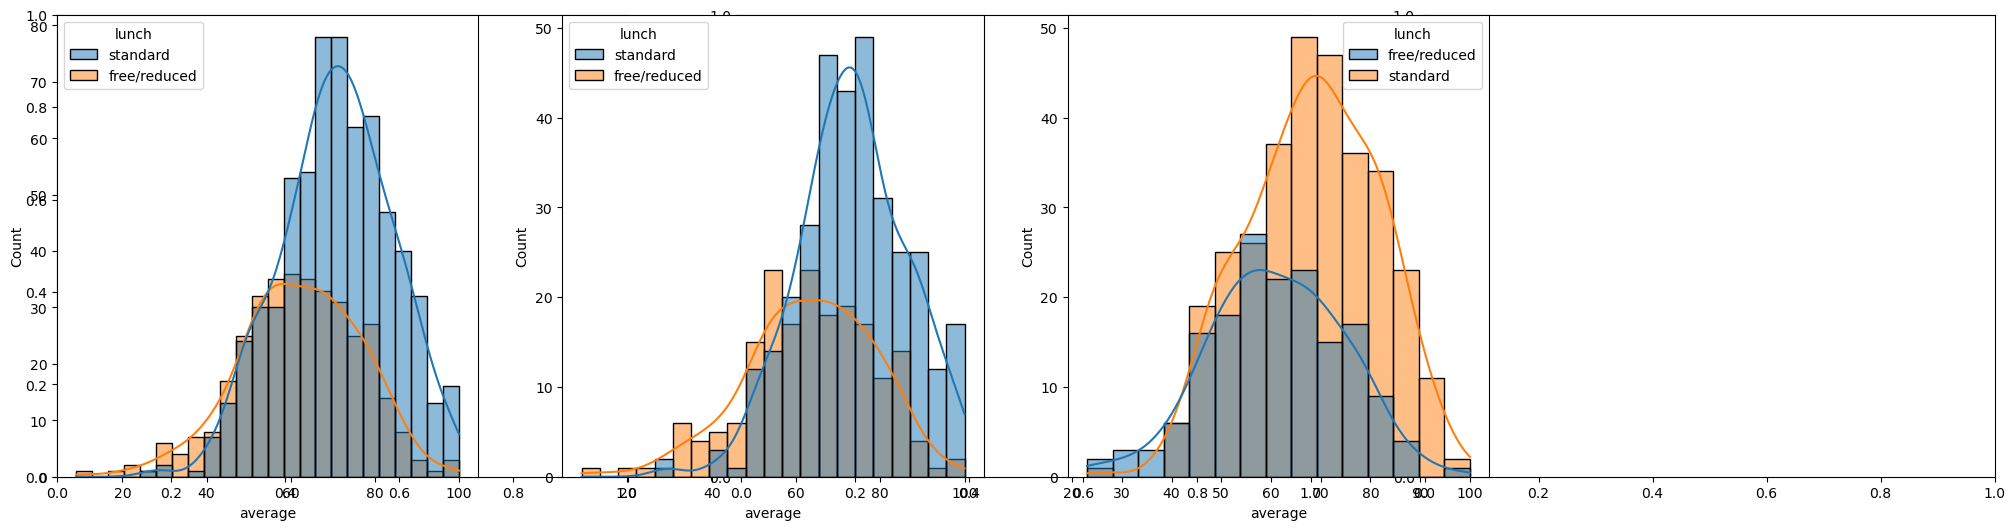

In [19]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

#### Insights

- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

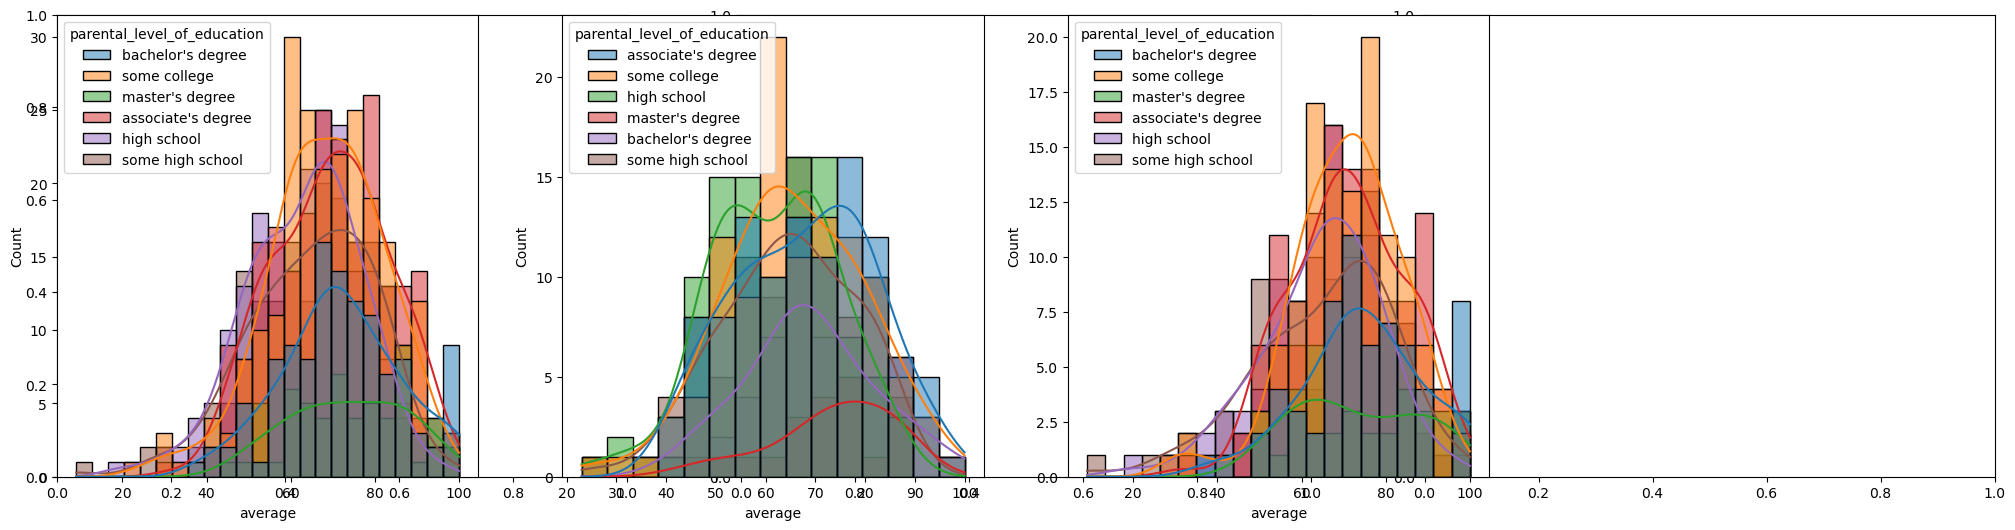

In [20]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

#### Insight

- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of some college their male child tend to perform well in exam.
- Again in 3rd plot, parent's whose education is of some college their female child tend to perform well in exam.

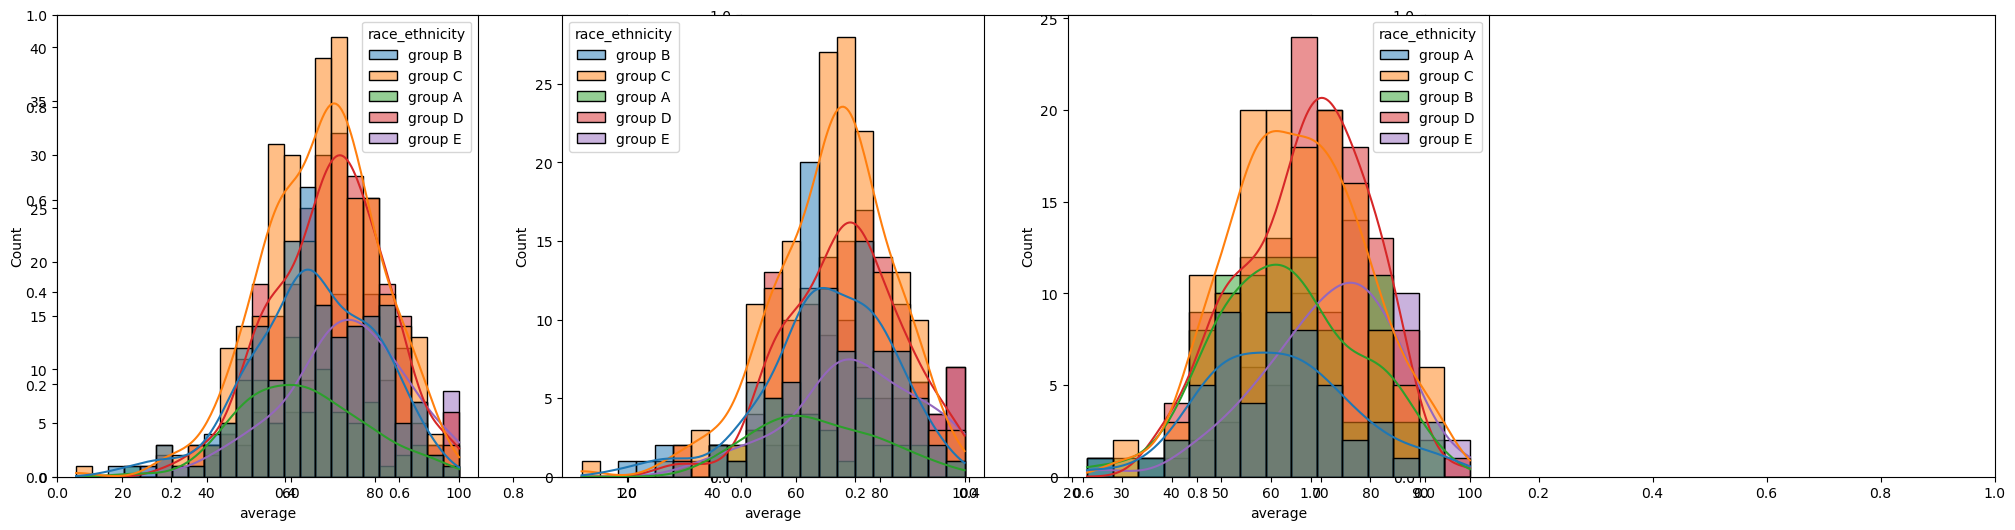

In [21]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

#### Insights

- Students of group A in all the above plots tend to perform poorly in exam.

### 3.2 Maximum score of students in all three subjects

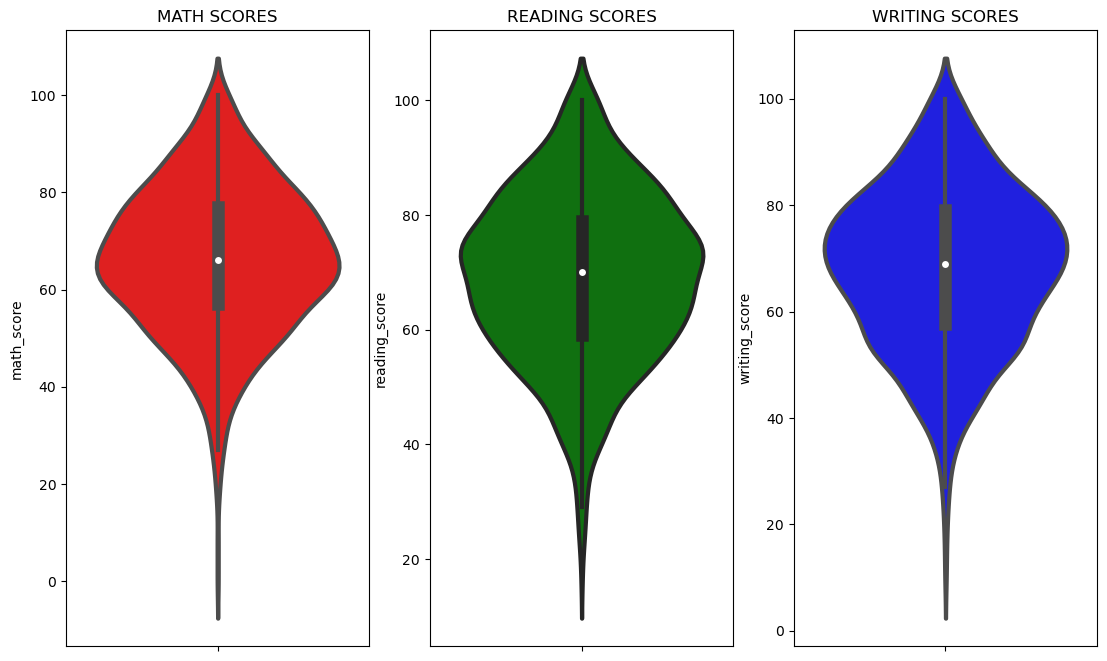

In [22]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()


#### Insights

From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 70-80

### 3.3 Multivariate analysis using pieplot

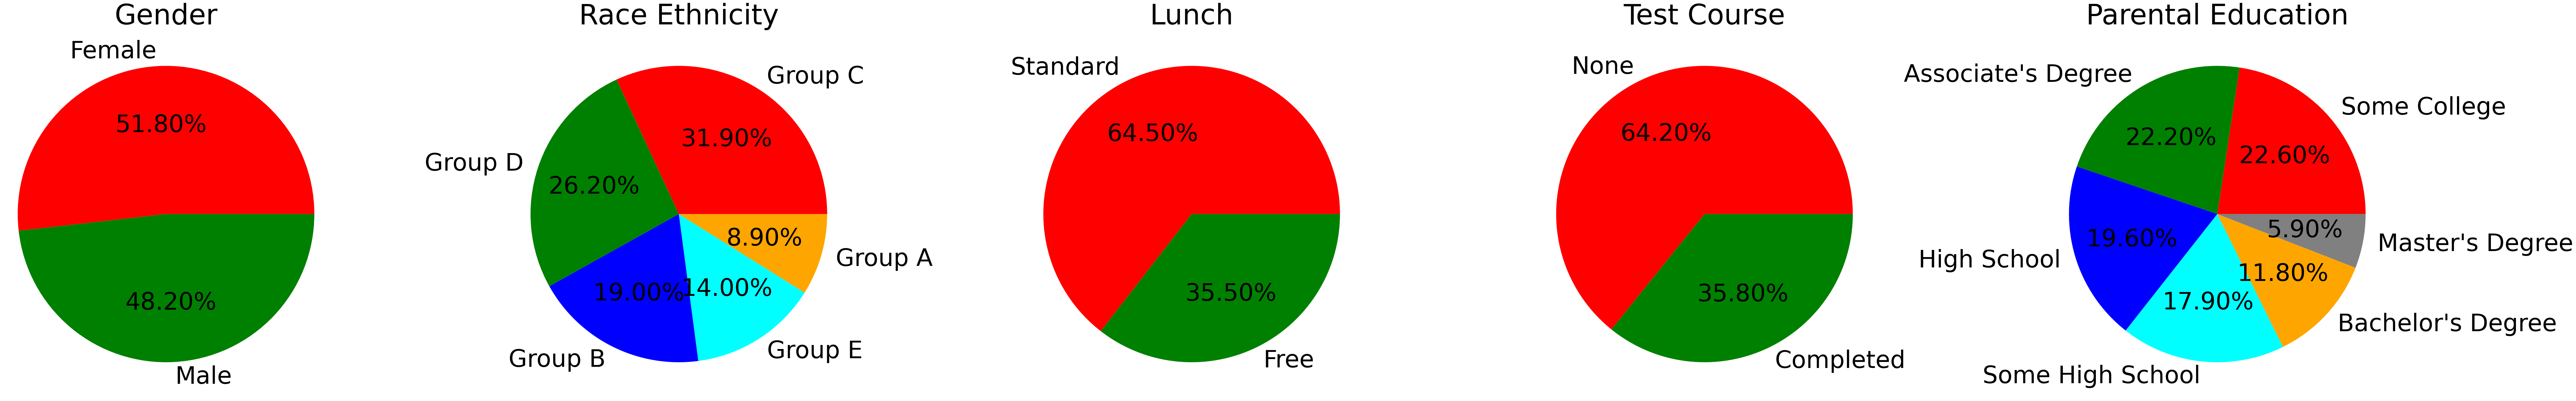

In [45]:
# A dictionary-like object that holds default settings for Matplotlib. 
plt.rcParams['figure.figsize'] = (90, 15)  

# Font sizes
LABEL_FONT_SIZE = 60  # Font size for the pie chart labels
AUTOPCT_FONT_SIZE = 50  # Font size for the percentage labels inside the pie
TITLE_FONT_SIZE = 70  # Font size for the pie chart titles

# Pie chart plots
def make_pie(size, labels, colors, title, ax):
    ax.pie(size, colors=colors, labels=labels, autopct=lambda p: '{:.2f}%'.format(p), textprops={'fontsize': LABEL_FONT_SIZE})
    ax.set_title(title, fontsize=TITLE_FONT_SIZE)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

fig, axs = plt.subplots(1, 5)  # Use subplots to define a grid of axes

# Gender Pie Chart
size = df['gender'].value_counts()
labels = 'Female', 'Male'
colors = ['red', 'green']
make_pie(size, labels, colors, 'Gender', axs[0])

# Race Ethnicity Pie Chart
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D', 'Group B', 'Group E', 'Group A'
colors = ['red', 'green', 'blue', 'cyan', 'orange']
make_pie(size, labels, colors, 'Race Ethnicity', axs[1])

# Lunch Pie Chart
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
colors = ['red', 'green']
make_pie(size, labels, colors, 'Lunch', axs[2])

# Test Course Pie Chart
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
colors = ['red', 'green']
make_pie(size, labels, colors, 'Test Course', axs[3])

# Parental Education Pie Chart
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree", 'High School', 'Some High School', "Bachelor's Degree", "Master's Degree"
colors = ['red', 'green', 'blue', 'cyan', 'orange', 'grey']
make_pie(size, labels, colors, 'Parental Education', axs[4])

plt.tight_layout()
plt.show()


#### Insights

- Number of Male and Female students is almost equal.
- Number of students is greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

### 3.4 Feature Wise Visualization
### 3.4.1 Gender Column
- How is the distribution of Gender?
- Does Gender have any impact on students' performance?

### UNIVARIATE ANALYSIS (How is the distribution of Gender?)

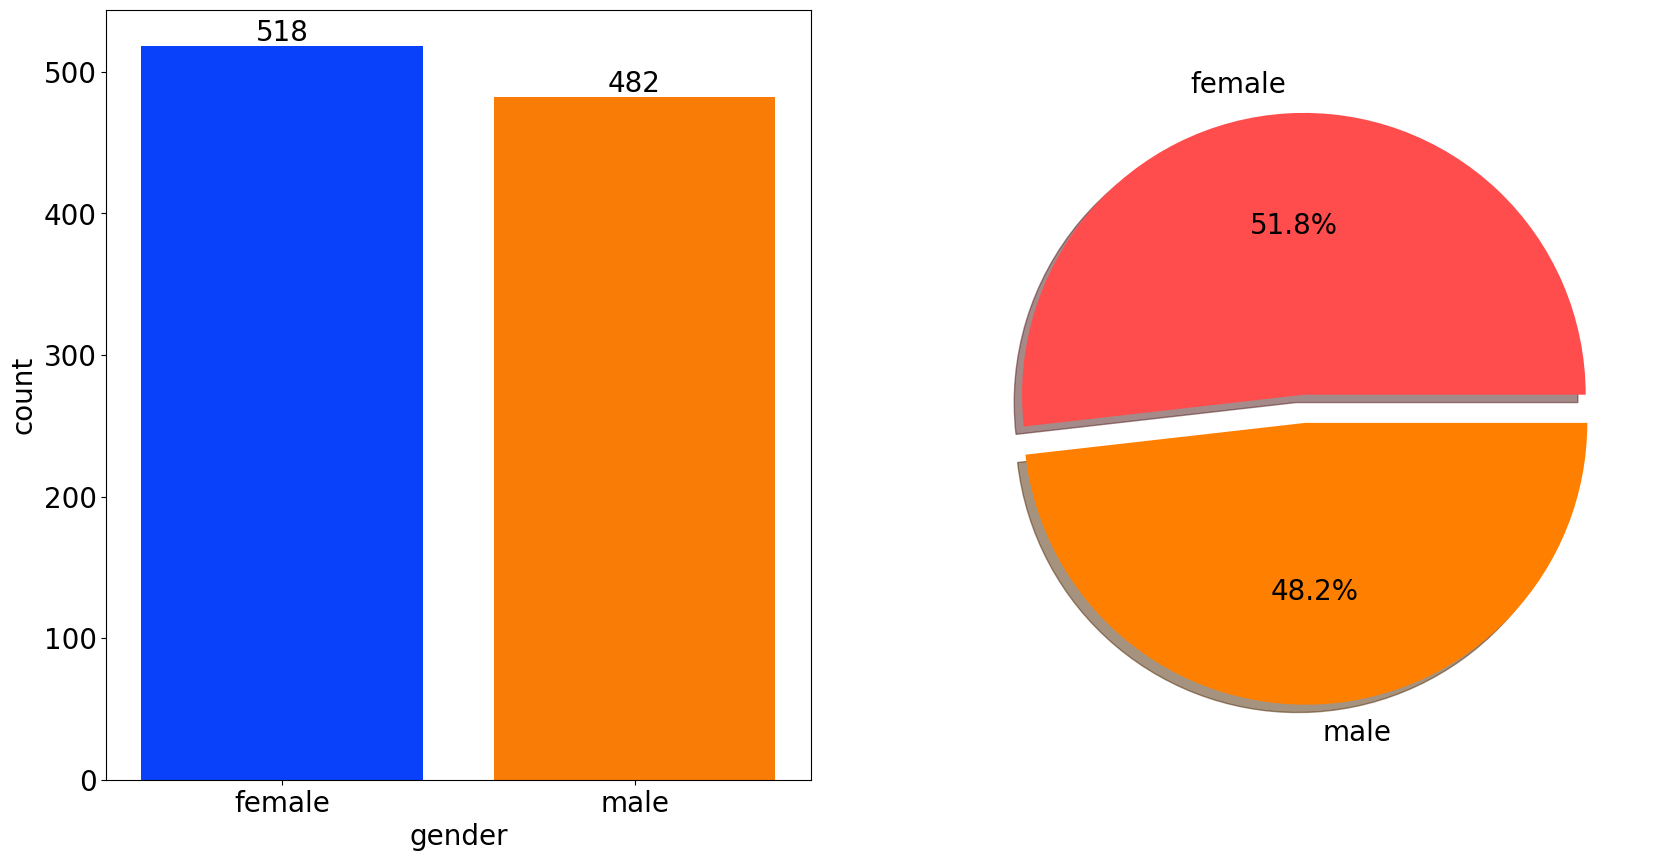

In [68]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Plot the countplot for gender
sns.countplot(x='gender', data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

# Get the value counts and corresponding labels sorted by index for consistency
gender_counts = df['gender'].value_counts().sort_index()
gender_labels = gender_counts.index

# Plot the pie chart with the correct labels order
ax[1].pie(x=gender_counts, labels=gender_labels, explode=[0, 0.1], autopct='%1.1f%%', shadow=True, colors=['#ff4d4d','#ff8000'])

plt.show()


#### Insights

- Gender has balanced data with female students at 518 (52%) and male students at 482 (48%). 

### BIVARIATE ANALYSIS (Does Gender have any impact on students' performance?)

In [71]:
# First, perform the groupby operation to create groups based on 'gender'
grouped = df.groupby('gender')

# Then apply the mean function only to numeric columns
gender_group = grouped.apply(lambda x: x.select_dtypes(include=[np.number]).mean())
gender_group


,math_score,reading_score,writing_score,total score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


In [78]:
female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]
print("Female Average and Math Score:", female_scores)
print("Male Average and Math Score:", male_scores)

Female Average and Math Score: [69.56949806949807, 63.633204633204635]
Male Average and Math Score: [65.8374827109267, 68.72821576763485]


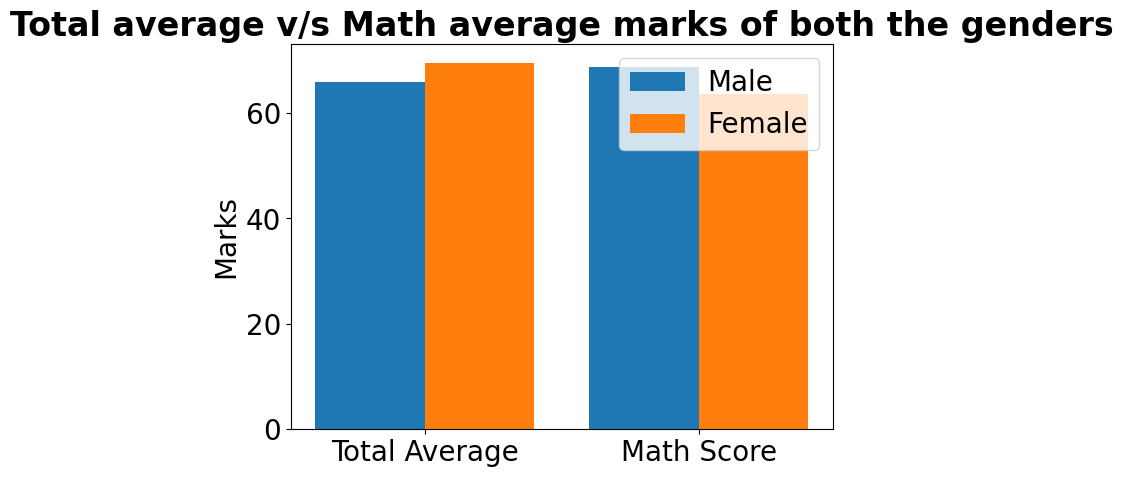

In [85]:
plt.figure(figsize=(7, 5))

X = ['Total Average', 'Math Score']

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

#### Insights
- On average females have a better overall score than males.
- Males have scored higher in Maths than females.

### 3.4.2 Race/Ethnicity column

- How is Group-wise distribution?
- Does Race/Ethnicity have any impact on students performance?

### UNIVARIATE ANALYSIS (How is Group wise distribution?)

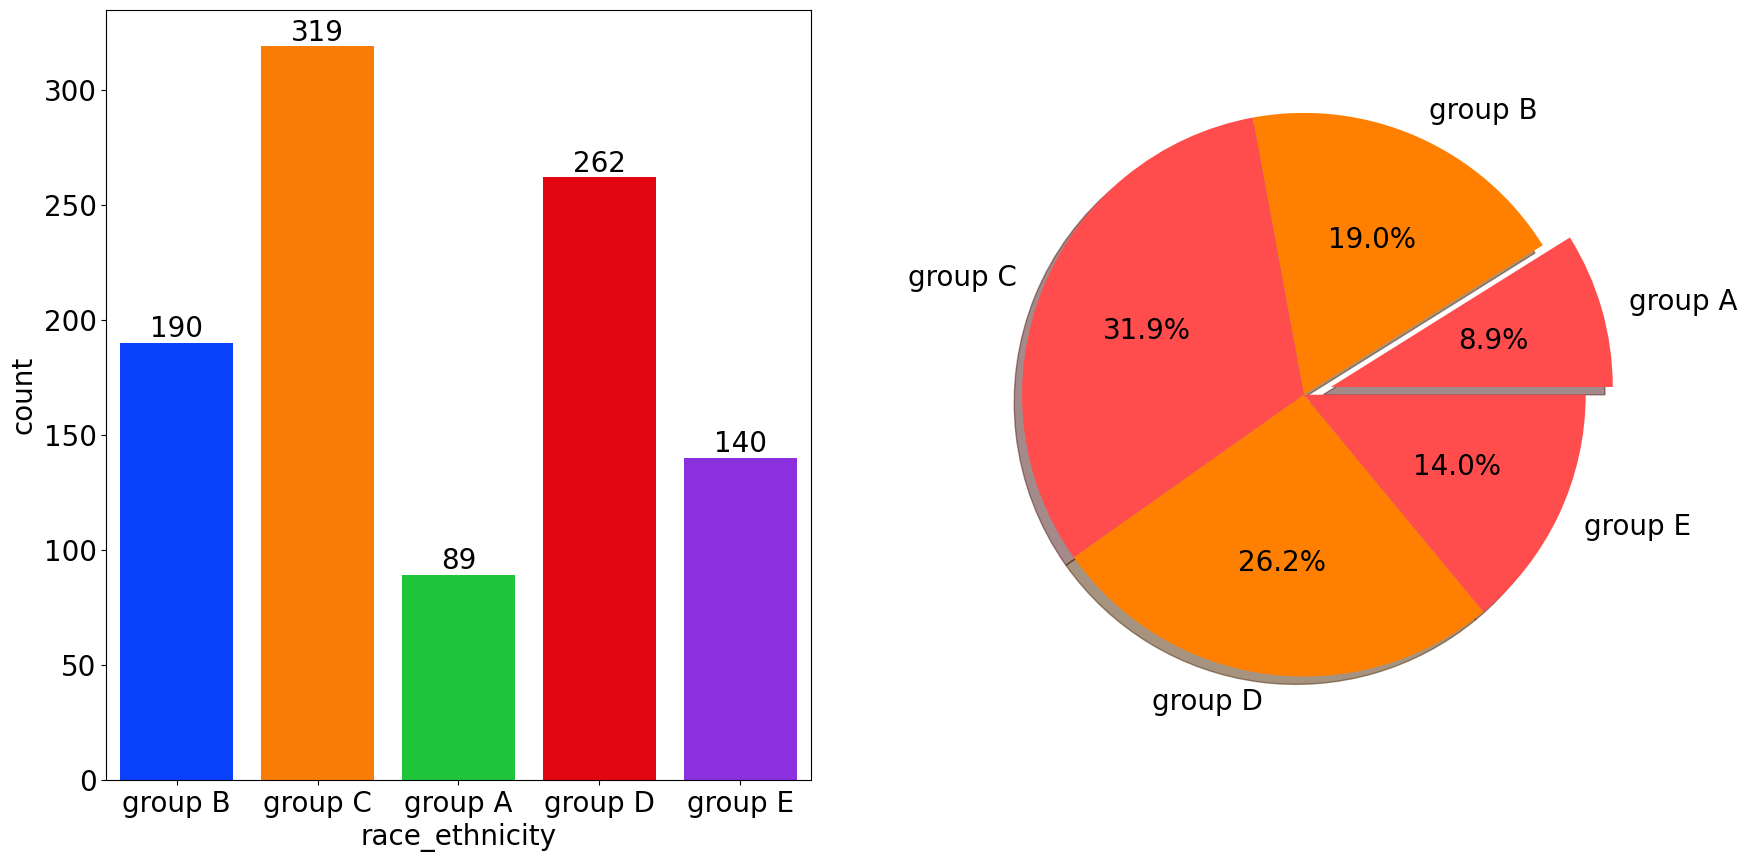

In [90]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Plot the countplot for gender
sns.countplot(x='race_ethnicity', data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

# Get the value counts and corresponding labels sorted by index for consistency
race_ethnicity_counts = df['race_ethnicity'].value_counts().sort_index()
race_ethnicity_labels = race_ethnicity_counts.index

# Plot the pie chart with the correct labels order
ax[1].pie(x=race_ethnicity_counts, labels=race_ethnicity_labels, explode=[0.1,0,0,0,0], autopct='%1.1f%%', shadow=True, colors=['#ff4d4d','#ff8000'])

plt.show()  

#### Insights
- Most of the students belonging from group C/group D
- Lowest number of students belong to group A

### BIVARIATE ANALYSIS (Does Race/Ethnicity has any impact on student's performance?)

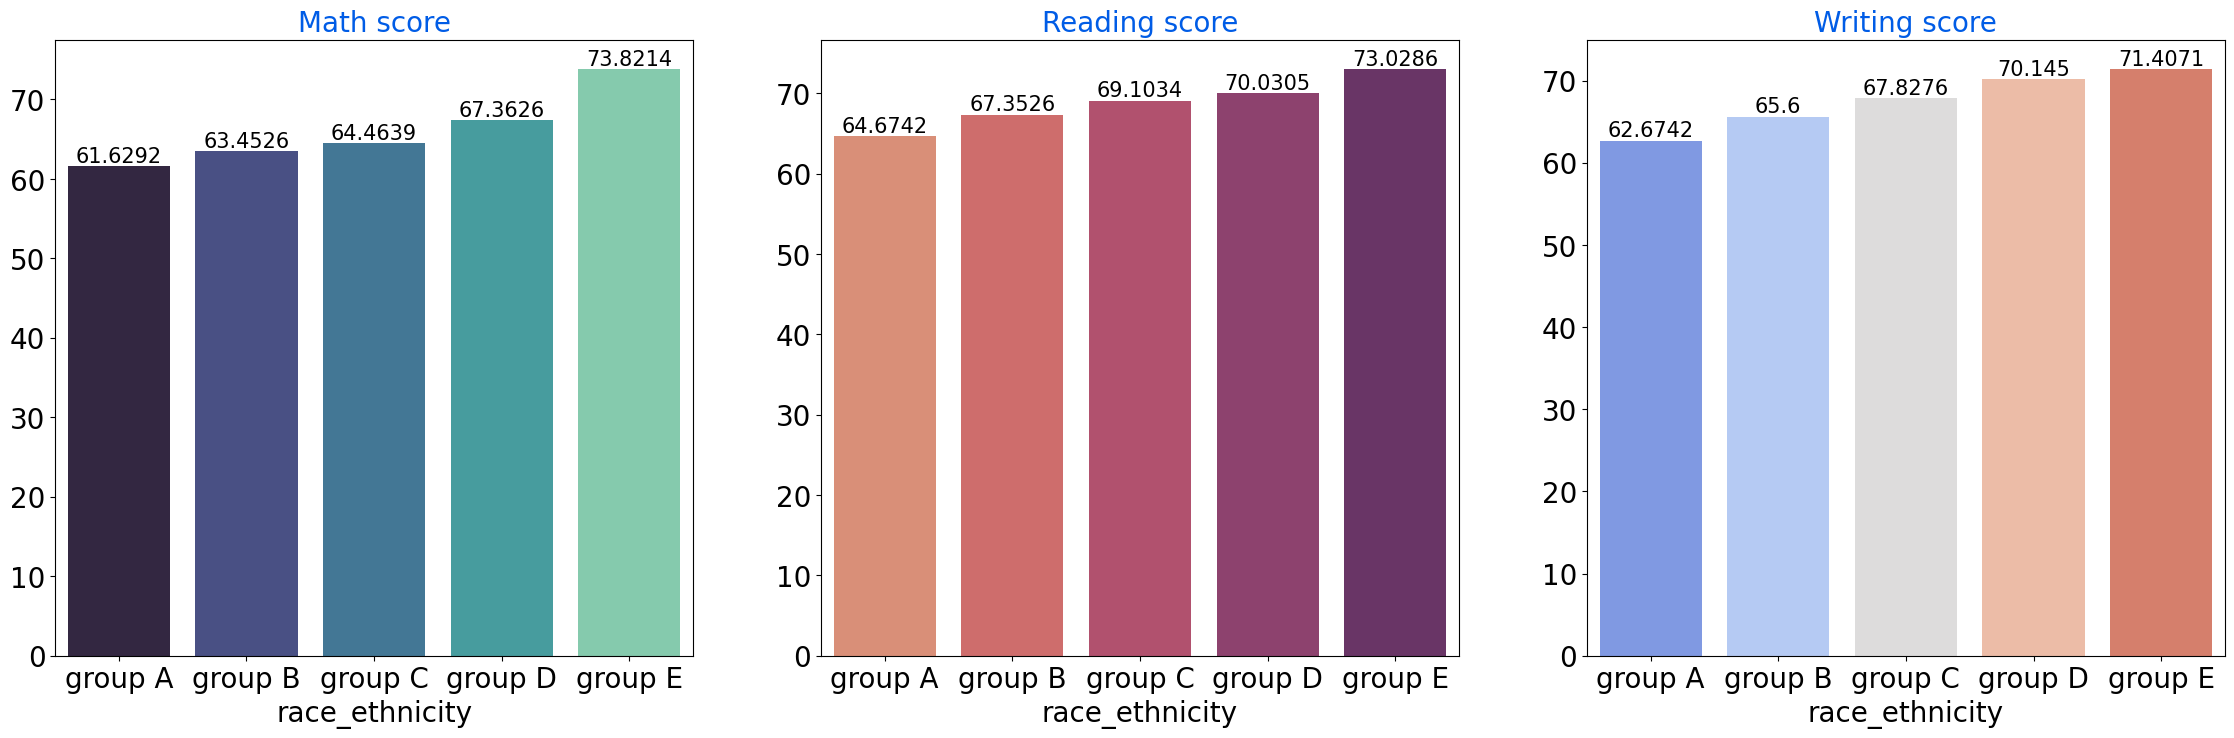

In [97]:
Group_data2=df.groupby('race_ethnicity')

f,ax=plt.subplots(1,3,figsize=(28,8))

sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

### Insights

- Group E students have scored the highest marks in Math, Reading, and Writing.
- Group A students have scored the lowest marks in Math, Reading, and writing.
- Students from a lower Socioeconomic status have a lower avg in all course subjects.

### 3.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
- What is the educational background of the student's parent?
- Does parental education have any impact on student's performance?

In [100]:
df['parental_level_of_education'].value_counts()

parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

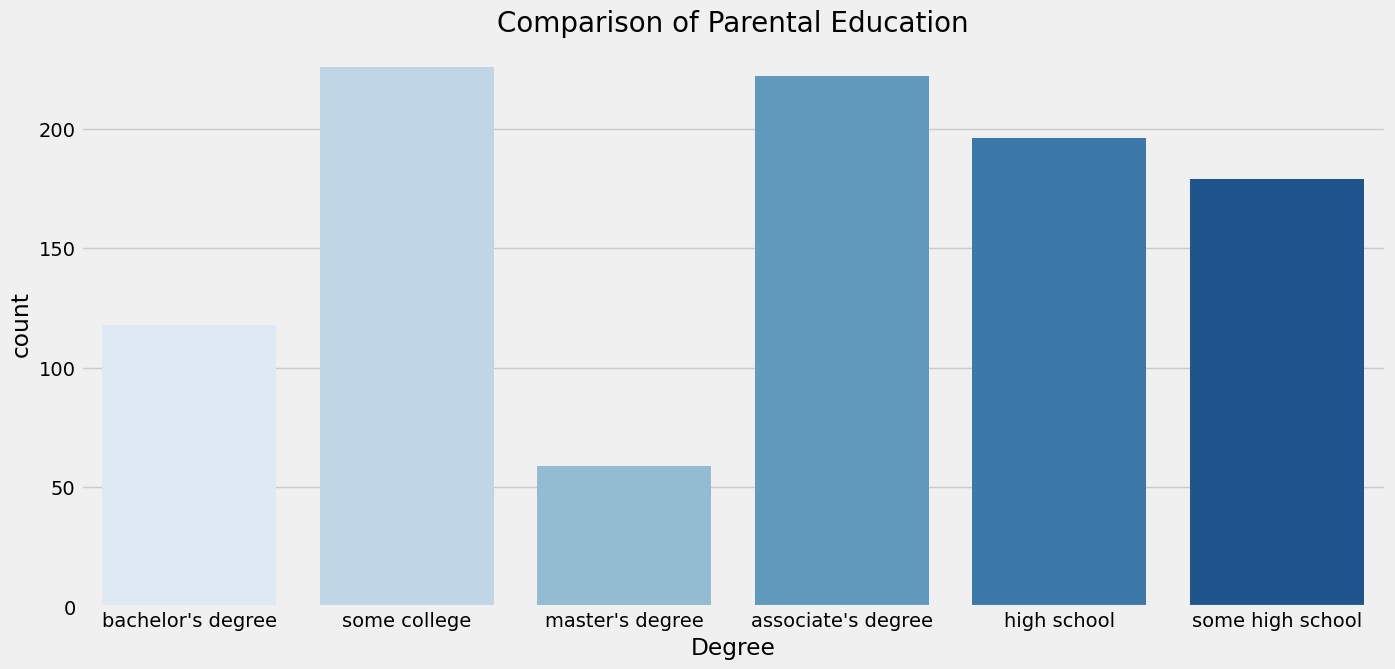

In [105]:
plt.rcParams['figure.figsize'] = (15, 7)
plt.style.use('fivethirtyeight')

sns.countplot(x='parental_level_of_education', data=df, palette='Blues')

plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

#### Insights
- Largest number of parents are from college.

### Bivariate Analysis (Does parental education have any impact on student's performance?)

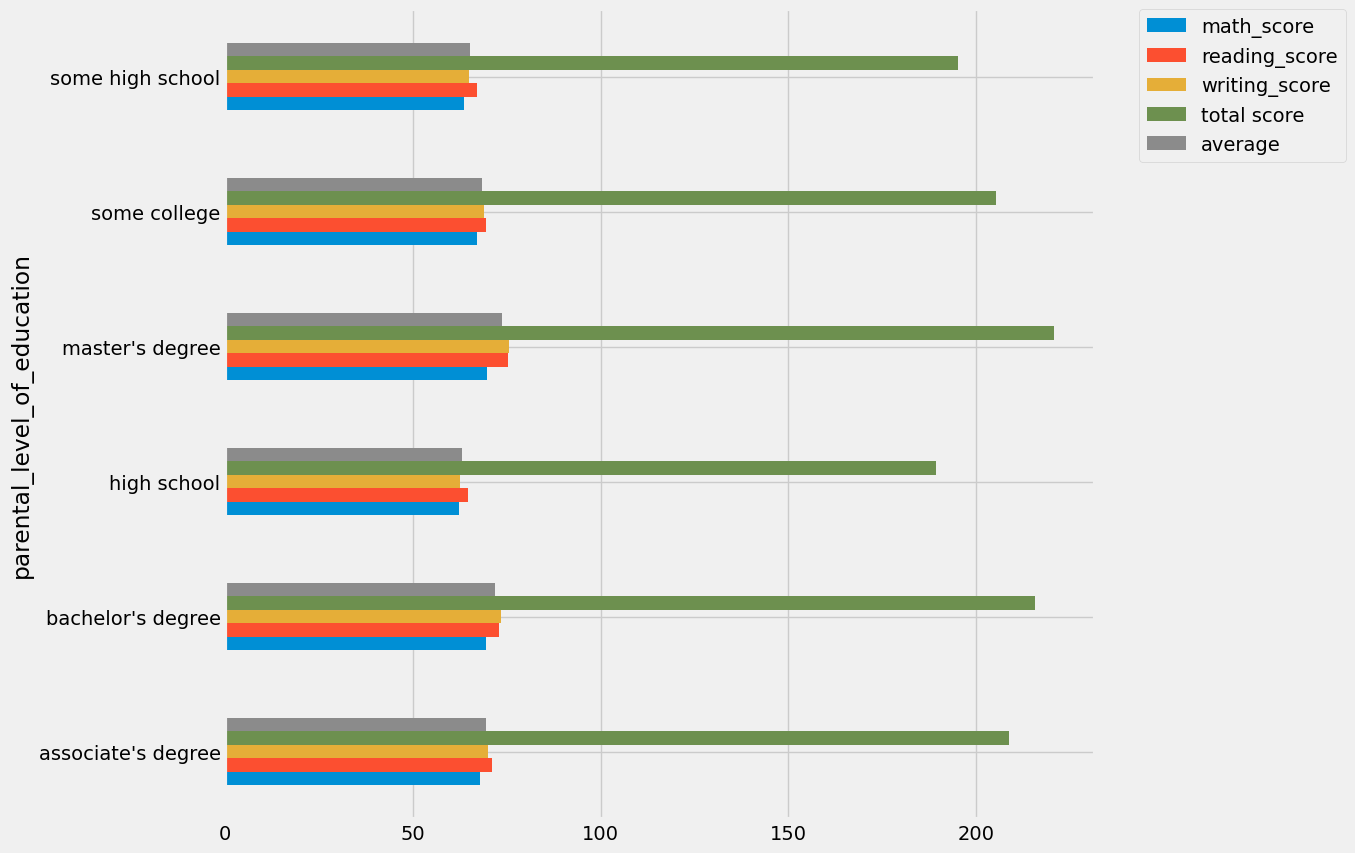

In [108]:
# First, select only the numeric columns for aggregation
numeric_cols = df.select_dtypes(include=[np.number])

# Then, perform the groupby and mean on these numeric columns only
numeric_cols.groupby(df['parental_level_of_education']).mean().plot(kind='barh', figsize=(10, 10))

# Set the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


#### Insights

- The total score of students whose parents have both a master's and a bachelor's degree is higher than total score of other levels of education.

### 3.4.4 LUNCH COLUMN

- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?

### UNIVARIATE ANALYSIS (Which type of lunch is most common amoung students ?)


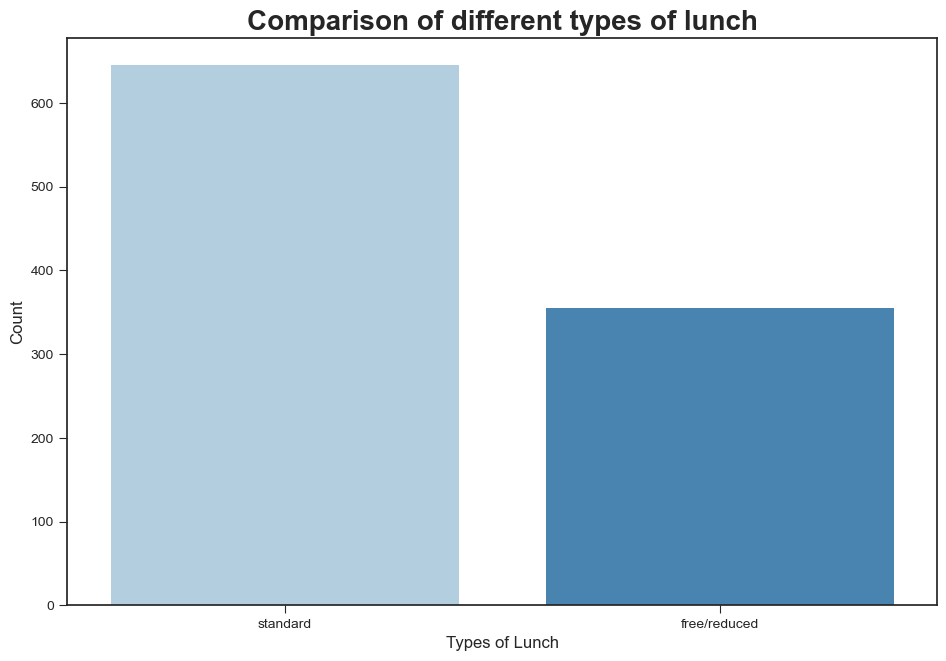

In [117]:
plt.rcParams['figure.figsize'] = (10, 7)
plt.style.use('seaborn-v0_8-ticks')  # Changed to 'seaborn'

import seaborn as sns

sns.countplot(x='lunch', data=df, palette='Blues')

plt.title('Comparison of different types of lunch', fontweight='bold', fontsize=20)  # Changed fontweight to 'bold'
plt.xlabel('Types of Lunch')
plt.ylabel('Count')
plt.show()


#### Insights
- Students served Standard lunch was more than those served free lunch.

### BIVARIATE ANALYSIS (What is the effect of lunch type on test results?)

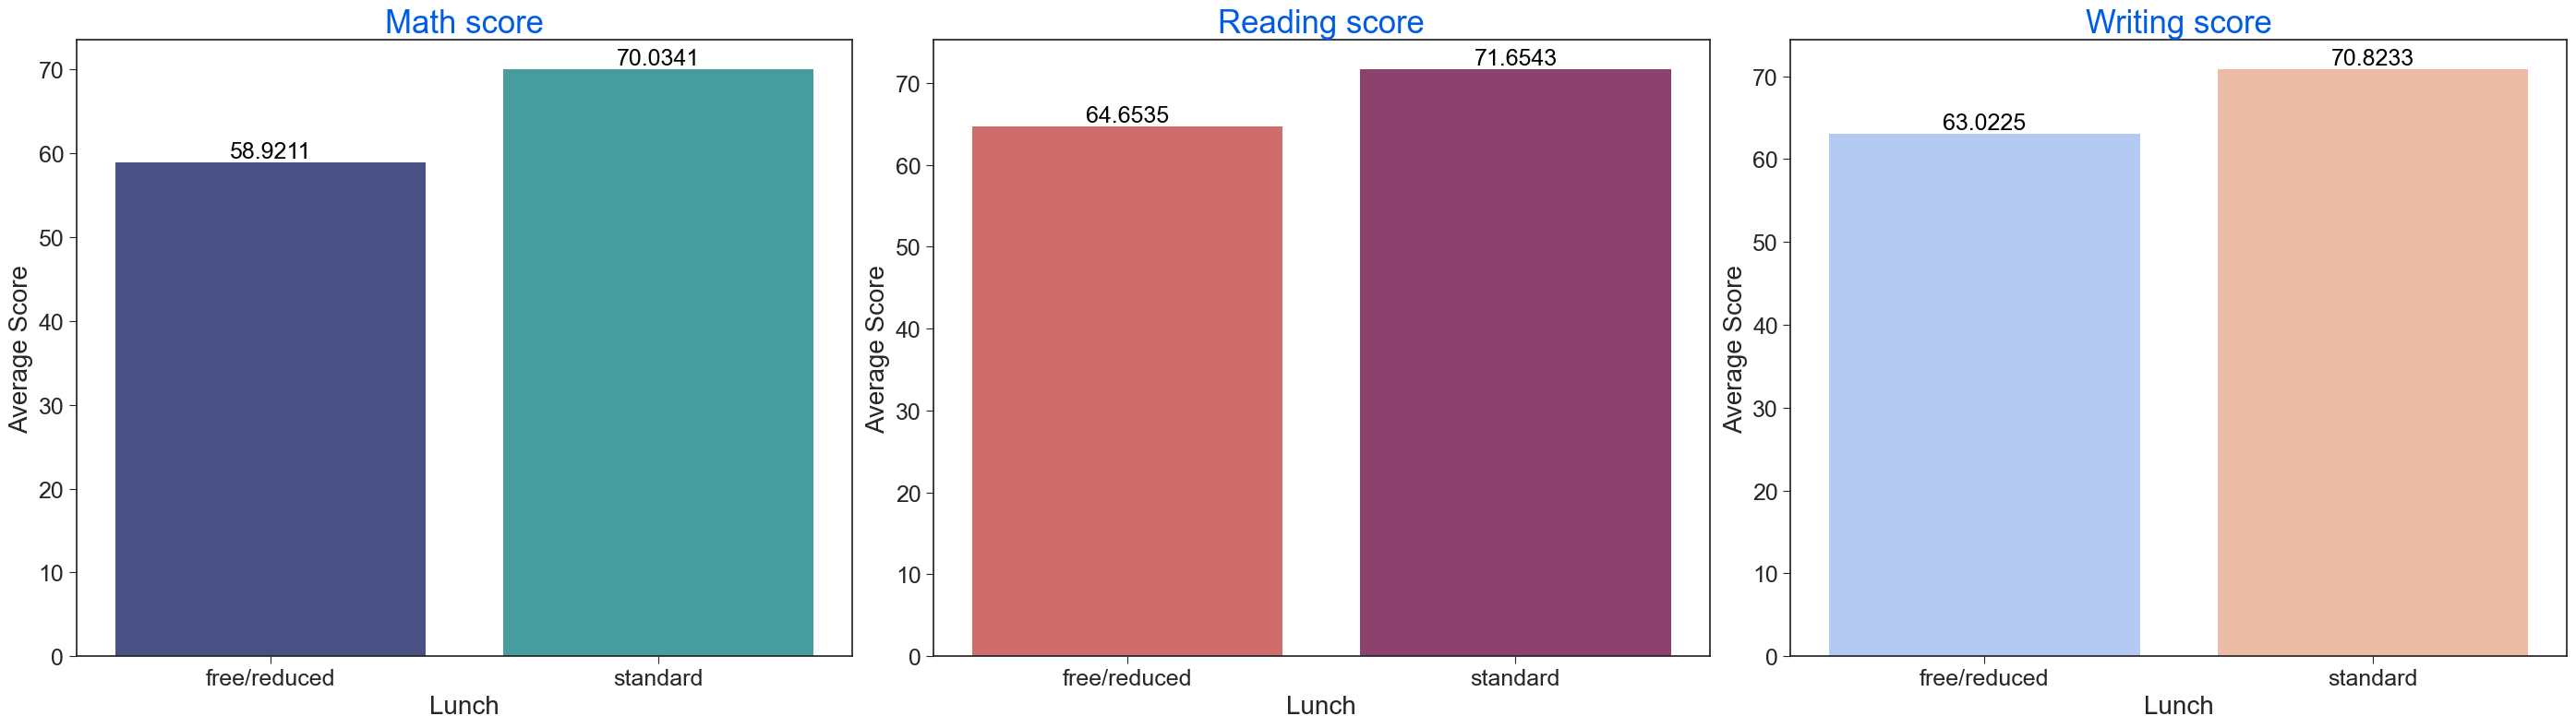

In [128]:
# Assuming df is your DataFrame and has already been defined
Group_data3 = df.groupby('lunch')

f, ax = plt.subplots(1, 3, figsize=(28, 8))

# Math score bar plot
sns.barplot(x=Group_data3['math_score'].mean().index, y=Group_data3['math_score'].mean().values, palette='mako', ax=ax[0])
ax[0].set_title('Math score', color='#005ce6', size=25)  # Adjusted title size

# Set x and y labels with increased font size
ax[0].set_xlabel('Lunch', fontsize=20)
ax[0].set_ylabel('Average Score', fontsize=20)

# Set the font size of the bar labels
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=18)  # Adjusted bar label size

# Set the font size of the tick labels
ax[0].tick_params(axis='both', which='major', labelsize=18)

# Reading score bar plot
sns.barplot(x=Group_data3['reading_score'].mean().index, y=Group_data3['reading_score'].mean().values, palette='flare', ax=ax[1])
ax[1].set_title('Reading score', color='#005ce6', size=25)  # Adjusted title size

ax[1].set_xlabel('Lunch', fontsize=20)
ax[1].set_ylabel('Average Score', fontsize=20)

for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=18)  # Adjusted bar label size

ax[1].tick_params(axis='both', which='major', labelsize=18)

# Writing score bar plot
sns.barplot(x=Group_data3['writing_score'].mean().index, y=Group_data3['writing_score'].mean().values, palette='coolwarm', ax=ax[2])
ax[2].set_title('Writing score', color='#005ce6', size=25)  # Adjusted title size

ax[2].set_xlabel('Lunch', fontsize=20)
ax[2].set_ylabel('Average Score', fontsize=20)

for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=18)  # Adjusted bar label size

ax[2].tick_params(axis='both', which='major', labelsize=18)

plt.tight_layout()
plt.show()


#### Insights

- Students who get standard lunch tend to perform better than students who got free or reduced lunchh

### 3.4.5 TEST PREPARATION COURSE COLUMN

- Does Test prepration course has any impact on student's performance?

In [130]:
df['test_preparation_course'].value_counts()

test_preparation_course
none         642
completed    358
Name: count, dtype: int64

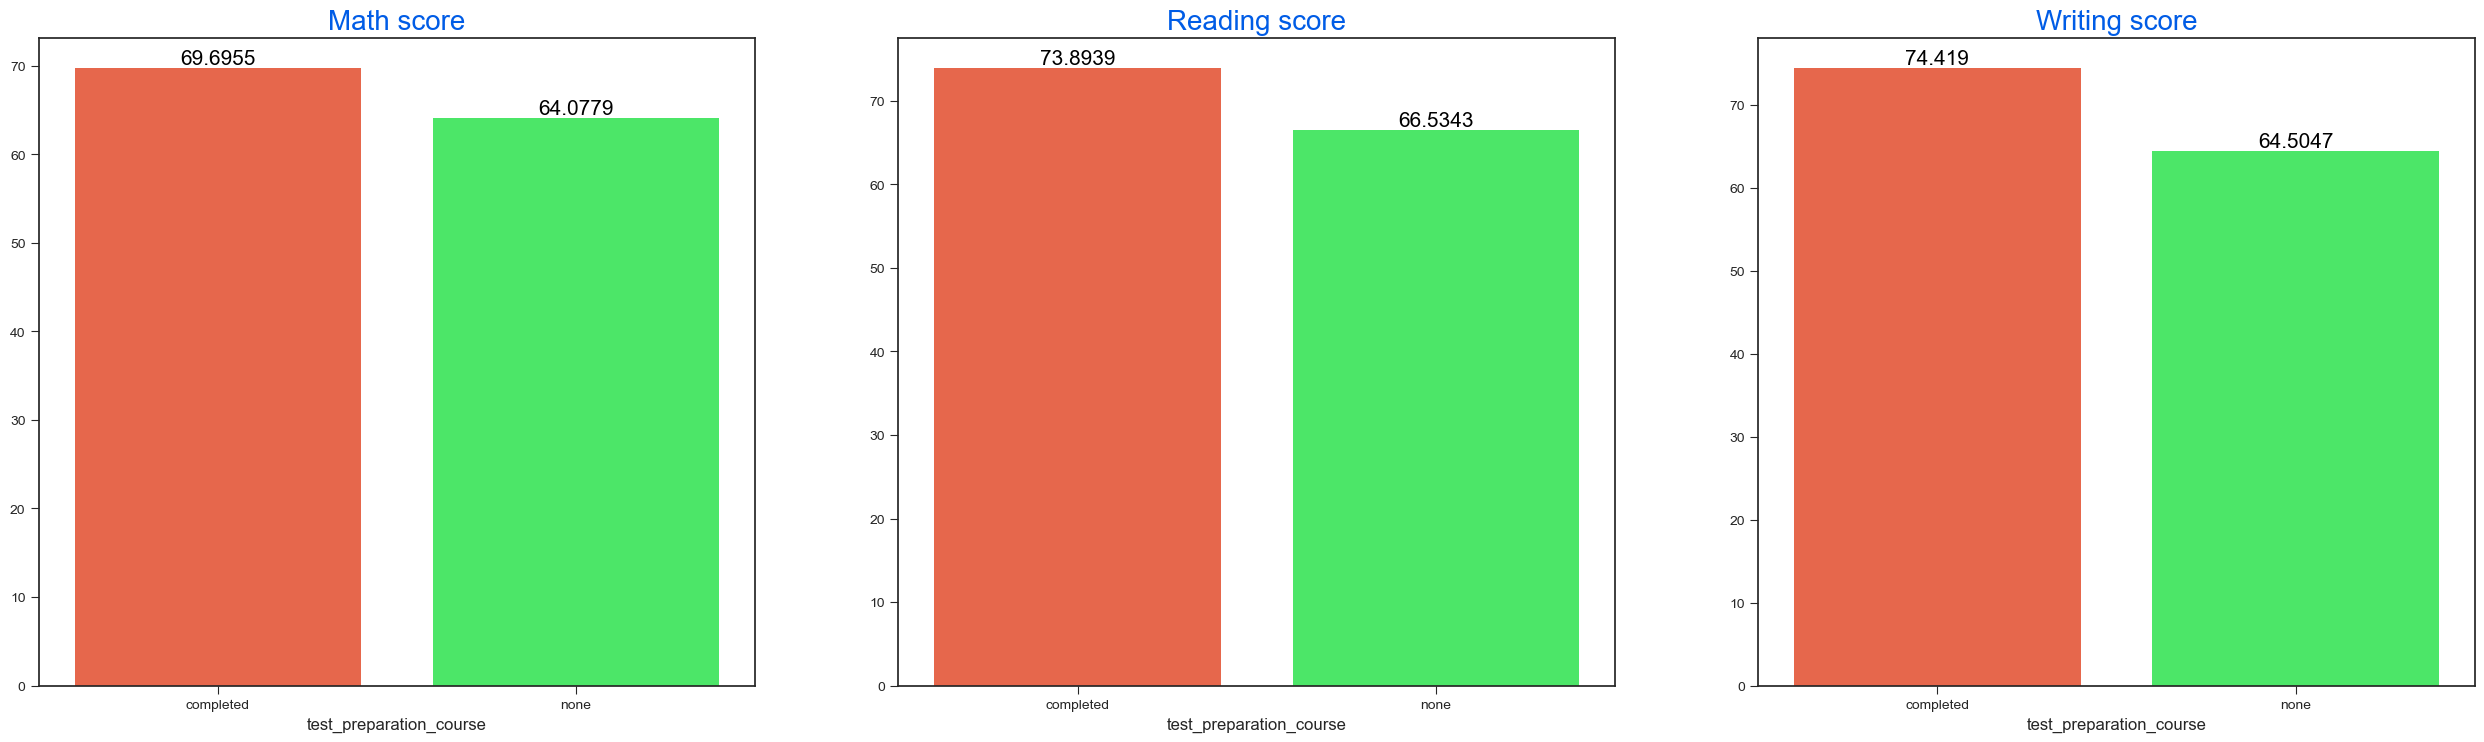

In [139]:
# Define your custom palette as a list of color hex codes
custom_palette = ['#FF5733', '#33FF57', '#3357FF']

# Assuming 'Group_data2' is your grouped data
# ... (grouping code)

f, ax = plt.subplots(1, 3, figsize=(28, 8))

# Use your custom palette for the barplot by passing the list directly
sns.barplot(x=Group_data2['math_score'].mean().index, y=Group_data2['math_score'].mean().values, palette=custom_palette, ax=ax[0])
ax[0].set_title('Math score', color='#005ce6', size=20)

for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index, y=Group_data2['reading_score'].mean().values, palette=custom_palette, ax=ax[1])
ax[1].set_title('Reading score', color='#005ce6', size=20)

for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index, y=Group_data2['writing_score'].mean().values, palette=custom_palette, ax=ax[2])
ax[2].set_title('Writing score', color='#005ce6', size=20)

for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=15)

plt.show()


#### Which type of lunch is most common among students along with test preparation course?

<Axes: xlabel='lunch', ylabel='writing_score'>

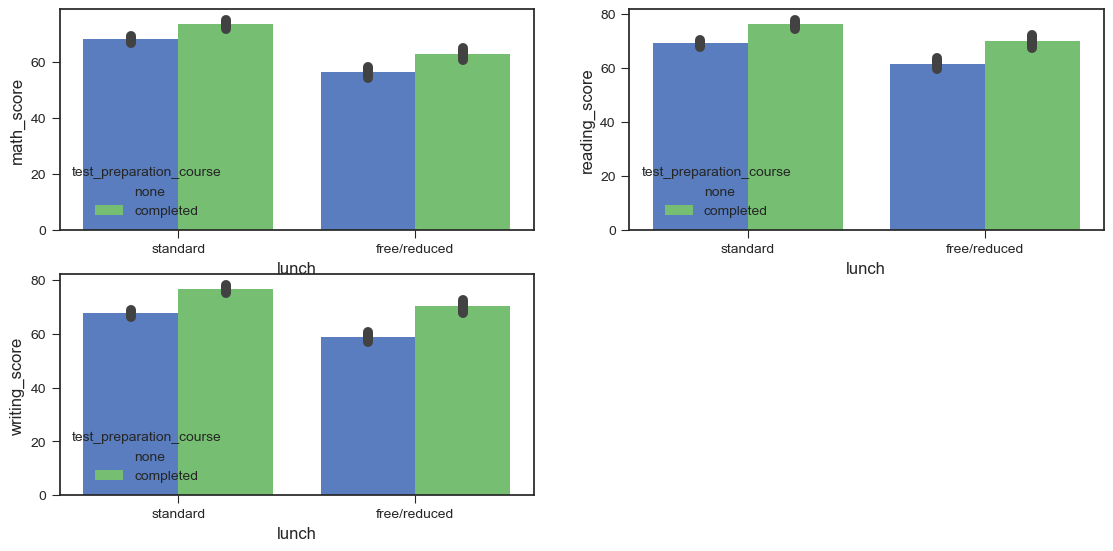

In [137]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

#### Insights

- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course


### 3.4.6 CHECKING OUTLIERS

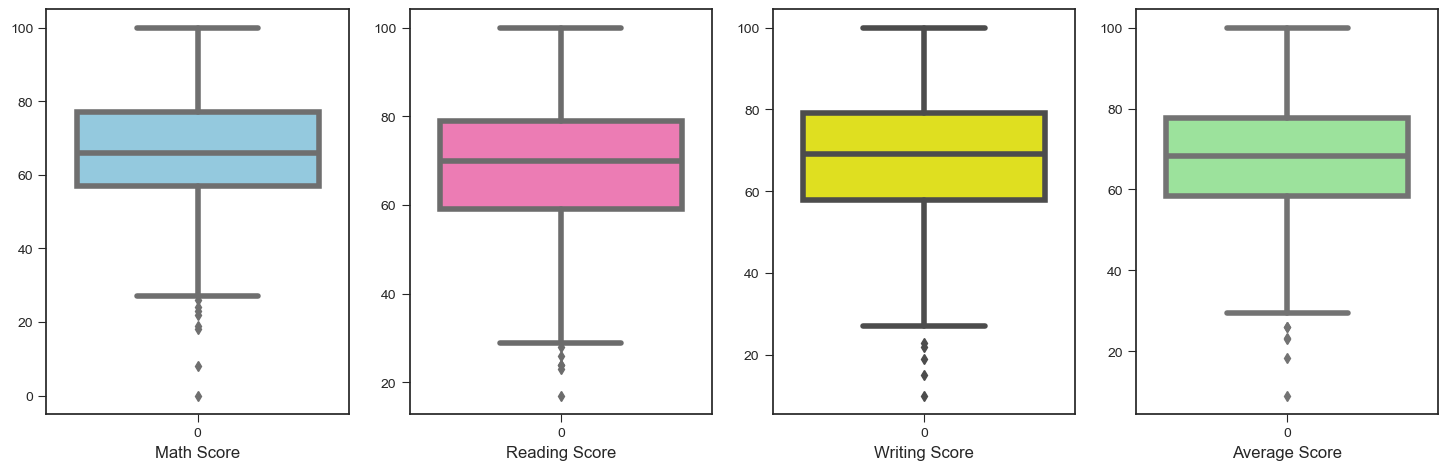

In [144]:
plt.subplots(1,4,figsize=(16,5))

plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.xlabel('Math Score')  # Set x-axis label

plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.xlabel('Reading Score')  # Set x-axis label

plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.xlabel('Writing Score')  # Set x-axis label

plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.xlabel('Average Score')  # Set x-axis label

plt.show()

1. Central Tendency and Spread:


- The median score (represented by the horizontal line in the middle of each box) seems to be consistent across all four categories, lying around the 60s to 70s range.
- The interquartile range (IQR), which is the height of the box, is narrowest for the Math Score and widest for the Writing Score, suggesting that the Writing Score has a more varied distribution among students compared to M

2. Symmetry and Outliers:

- All categories exhibit potential outliers (individual points below the lower whisker or above the upper whisker), with Math Score and Writing Score showing a higher number of low outliers.
- The distribution of the Reading and Writing Scores seems slightly skewed towards the lower end, indicated by the presence of more outliers on the lower side and the median line being closer to the top of the bo

3. Variability:
- The variability, as indicated by the range of the data (from the lower to the upper whisker), is similar across the subjects, but the Writing Score shows a slightly higher range, meaning students' scores in writing vary more than in Math and Reading.
x.
ath.

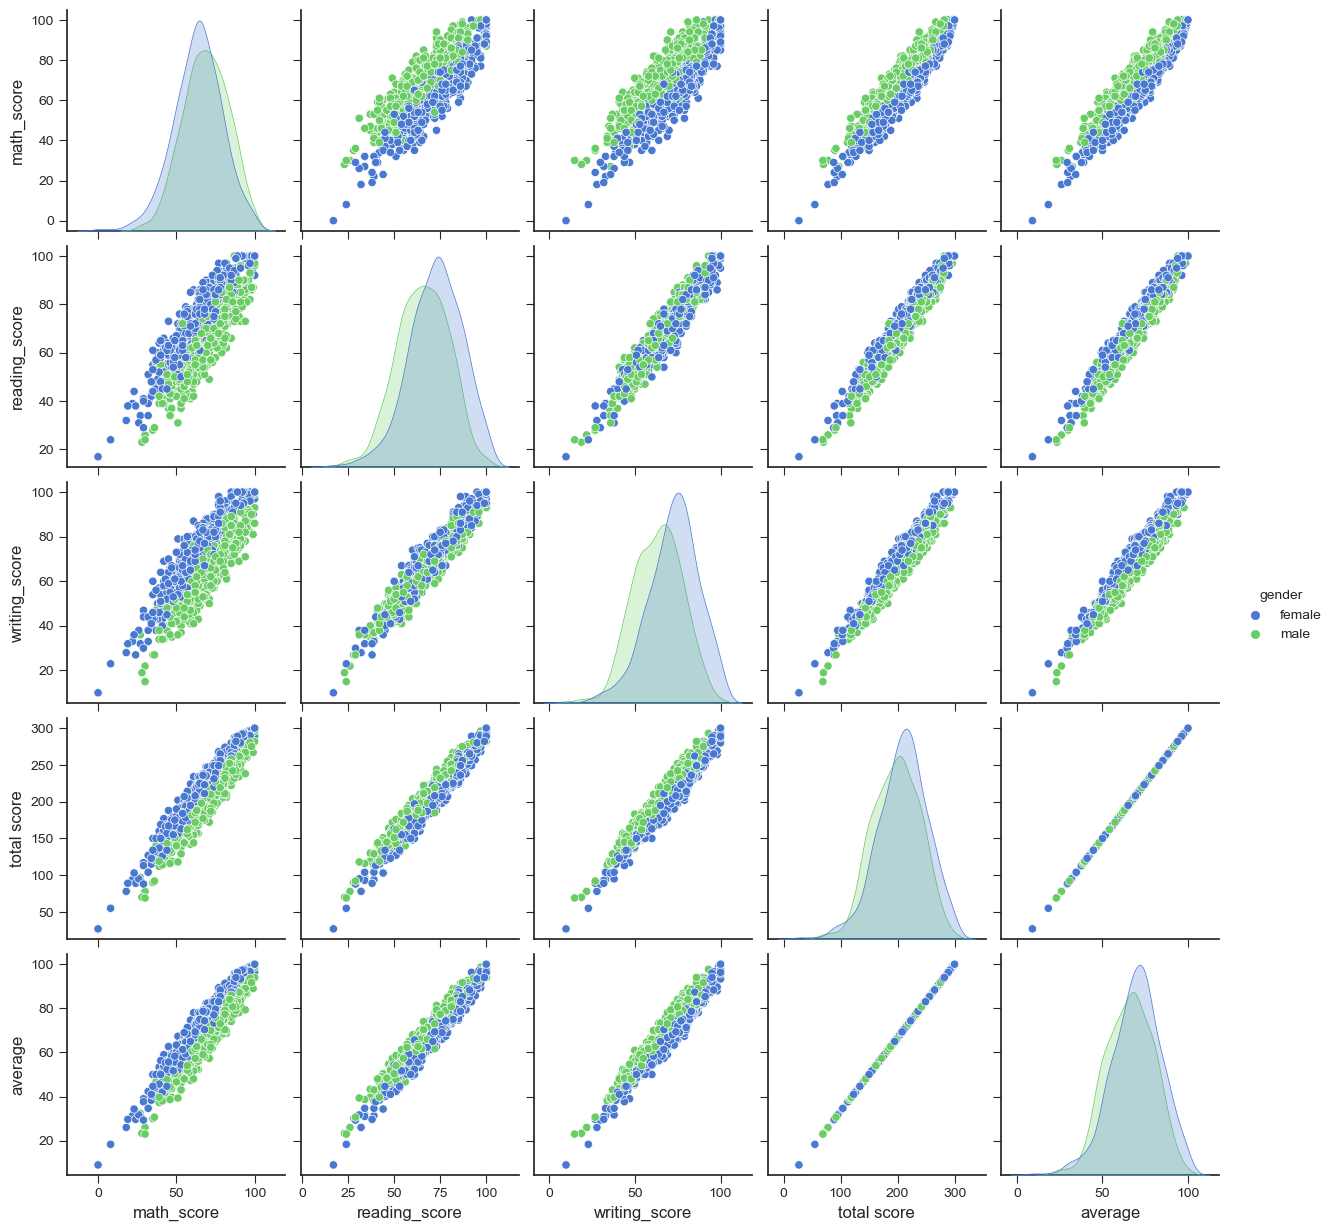

In [142]:
sns.pairplot(df,hue = 'gender')
plt.show()

#### Insights
- From the above plot it is clear that all scores increase linearly with each other.

### 4. Conclusions
- Student's performance is related with lunch, race, and parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is beneficial

### 5. Model Training
### 5.1 Model for students performance in Math

In [153]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


### Preparing X and Y variables for Math scores

In [154]:
X = df.drop(columns=['math_score', 'average', 'total score'],axis=1)
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [155]:
y=df['math_score']

In [156]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [157]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [161]:
num_features

Index(['reading_score', 'writing_score'], dtype='object')

In [162]:
cat_features

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')

In [167]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(),
                                 Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['reading_score', 'writing_score'], dtype='object'))])

In [158]:
X = preprocessor.fit_transform(X)

In [159]:
X.shape

(1000, 19)

In [160]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

### Create an Evaluate Function to give all metrics after model Training

In [163]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [164]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3231
- Mean Absolute Error: 4.2667
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3940
- Mean Absolute Error: 4.2148
- R2 Score: 0.8804


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7088
- Mean Absolute Error: 4.5177
- R2 Score: 0.8554
-----------------------

### Results

In [165]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.880433
5,Random Forest Regressor,0.852693
7,CatBoosting Regressor,0.851632
8,AdaBoost Regressor,0.840755
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.784030
4,Decision Tree,0.762984


### Insights:

The best two performing models are Ridge and Linear Regression for students performance in Math.

### Linear Regression


In [166]:
# Initialize the linear regression model
lin_model = LinearRegression(fit_intercept=True)

# Fit the model to your training data
lin_model = lin_model.fit(X_train, y_train)

# Predict on the test data
y_pred = lin_model.predict(X_test)

# Calculate the accuracy of the model using the R-squared score
score = r2_score(y_test, y_pred)*100

# Print out the accuracy
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.04


### Ridge Regression

In [168]:
# Initialize the Ridge regression model
# The alpha parameter controls the strength of the regularization
ridge_model = Ridge(alpha=1.0, fit_intercept=True)

# Fit the model to your training data
ridge_model.fit(X_train, y_train)

# Predict on the test data
y_pred = ridge_model.predict(X_test)

# Calculate the accuracy of the model using the R-squared score
score = r2_score(y_test, y_pred) * 100

# Print out the accuracy
print("Accuracy of the Ridge regression model is %.2f" % score)


Accuracy of the Ridge regression model is 88.06


### Plot y_pred and y_test

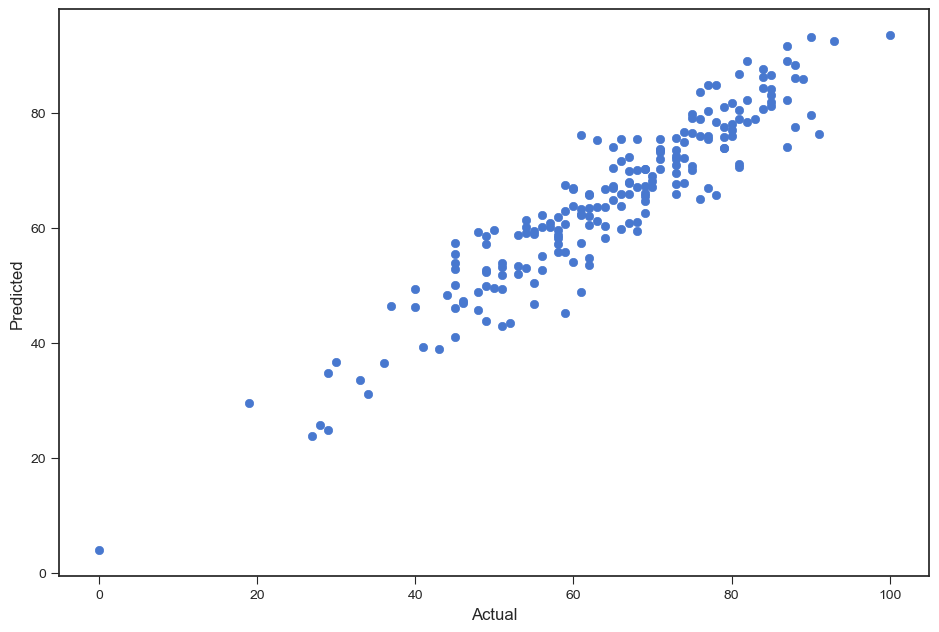

In [169]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

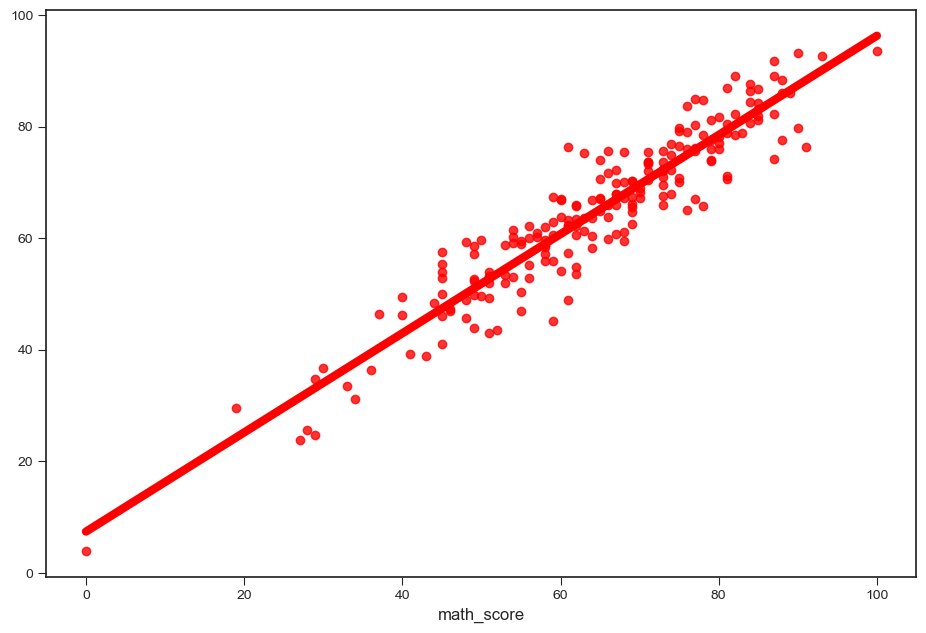

In [170]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

### Difference between Actual and Predicted Values

In [171]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.398705,14.601295
737,53,58.842469,-5.842469
740,80,76.992129,3.007871
660,74,76.805898,-2.805898
411,84,87.615387,-3.615387
...,...,...,...
408,52,43.492293,8.507707
332,62,62.170763,-0.170763
208,74,67.910325,6.089675
613,65,67.061504,-2.061504


### 5.2 Model for students performance in English

In [172]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


### Preparing X and Y variables for Reading Score

In [175]:
X = df.drop(columns=['reading_score', 'total score', 'average'],axis=1)

In [176]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,69,88
2,female,group B,master's degree,standard,none,90,93
3,male,group A,associate's degree,free/reduced,none,47,44
4,male,group C,some college,standard,none,76,75


In [177]:
y = df['reading_score']

In [178]:
y

0      72
1      90
2      95
3      57
4      78
       ..
995    99
996    55
997    71
998    78
999    86
Name: reading_score, Length: 1000, dtype: int64

In [179]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [180]:
X = preprocessor.fit_transform(X)

In [181]:
X.shape

(1000, 19)

In [182]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

In [183]:
# Create an Evaluate Function to give all metrics after model Training
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [184]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 3.8718
- Mean Absolute Error: 3.1220
- R2 Score: 0.9282
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4.3088
- Mean Absolute Error: 3.4908
- R2 Score: 0.9180


Lasso
Model performance for Training set
- Root Mean Squared Error: 4.2215
- Mean Absolute Error: 3.4220
- R2 Score: 0.9147
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4.6350
- Mean Absolute Error: 3.6941
- R2 Score: 0.9051


Ridge
Model performance for Training set
- Root Mean Squared Error: 3.8720
- Mean Absolute Error: 3.1221
- R2 Score: 0.9282
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4.3028
- Mean Absolute Error: 3.4861
- R2 Score: 0.9182


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 4.8003
- Mean Absolute Error: 3.7423
- R2 Score: 0.8897
-----------------------

### Result for English Score

In [187]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)


,Model Name,R2_Score
2,Ridge,0.918184
0,Linear Regression,0.917955
5,Random Forest Regressor,0.911569
7,CatBoosting Regressor,0.907223
1,Lasso,0.905059
8,AdaBoost Regressor,0.902011
6,XGBRegressor,0.896433
3,K-Neighbors Regressor,0.837096
4,Decision Tree,0.829418


### Again both Linear Regression and Ridge are the best performing models. However, Random Forest Regressor is another model that has a good accuracy score.

### 5.3 Model for students performance in Writing

In [188]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


### Preparing X and Y variables for Writing Score

In [189]:
X = df.drop(columns=['writing_score', 'total score', 'average'],axis=1)

In [190]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score
0,female,group B,bachelor's degree,standard,none,72,72
1,female,group C,some college,standard,completed,69,90
2,female,group B,master's degree,standard,none,90,95
3,male,group A,associate's degree,free/reduced,none,47,57
4,male,group C,some college,standard,none,76,78


In [191]:
y = df['math_score']

In [192]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [193]:
X = preprocessor.fit_transform(X)

In [194]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

In [196]:
# Create an Evaluate Function to give all metrics after model Training
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [201]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]
mae_list =[]
rmse_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    mae_list.append(model_test_mae)
    rmse_list.append(model_test_rmse)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000


Lasso
Model performance for Training set
- Root Mean Squared Error: 1.0094
- Mean Absolute Error: 0.8032
- R2 Score: 0.9955
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.0575
- Mean Absolute Error: 0.8295
- R2 Score: 0.9954


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.0471
- Mean Absolute Error: 0.0375
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0472
- Mean Absolute Error: 0.0371
- R2 Score: 1.0000


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 3.6125
- Mean Absolute Error: 2.8388
- R2 Score: 0.9421
-----------------------

In [202]:
pd.DataFrame(list(zip(model_list, r2_list, rmse_list, mae_list)), columns=['Model Name', 'R2_Score', 'rmse','mae']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score,rmse,mae
0,Linear Regression,1.000000,3.903137e-14,3.172573e-14
2,Ridge,0.999991,4.717890e-02,3.706026e-02
4,Decision Tree,0.998521,6.000000e-01,7.000000e-02
6,XGBRegressor,0.998494,6.054288e-01,8.748100e-02
5,Random Forest Regressor,0.996375,9.392585e-01,1.156500e-01
1,Lasso,0.995404,1.057545e+00,8.295349e-01
7,CatBoosting Regressor,0.994043,1.203959e+00,3.267729e-01
8,AdaBoost Regressor,0.989143,1.625377e+00,1.137048e+00
3,K-Neighbors Regressor,0.912759,4.607516e+00,3.498000e+00


### Most models have high accuracy for students' performance in Writing. 

############################## End of coding ###########################################